<h3>Focusing on drug crime<h3>

In [471]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dropout


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [472]:
# load dataset
df = pd.read_csv('sixthClean.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1333 non-null   int64  
 1   Type        1333 non-null   object 
 2   Latitude    1333 non-null   float64
 3   Longitude   1333 non-null   float64
 4   Year        1333 non-null   int64  
 5   Month       1333 non-null   int64  
 6   Day         1333 non-null   int64  
 7   Hour        1333 non-null   int64  
 8   Minute      1333 non-null   int64  
 9   Second      1333 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 104.3+ KB


,Unnamed: 0,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute,Second
0,3,Person search,51.517431,-0.082458,2019,12,3,9,48,8
1,4,Person search,51.516814,-0.081620,2019,12,4,2,53,26
2,5,Person search,51.513114,-0.086272,2019,12,4,3,15,57
3,6,Person search,51.518060,-0.110683,2019,12,4,6,36,19
4,7,Person search,51.517680,-0.078484,2019,12,4,12,37,18


In [473]:
# encode the Type column by assigning to 0 if it is "Person search" and 1 if it is "Person and Vehicle search"
df['Type'] = df['Type'].map({'Person search': 0, 'Person and Vehicle search': 1})
df.head()
# drop the first column
df = df.drop(df.columns[0], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       1333 non-null   int64  
 1   Latitude   1333 non-null   float64
 2   Longitude  1333 non-null   float64
 3   Year       1333 non-null   int64  
 4   Month      1333 non-null   int64  
 5   Day        1333 non-null   int64  
 6   Hour       1333 non-null   int64  
 7   Minute     1333 non-null   int64  
 8   Second     1333 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 93.9 KB


,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute,Second
0,0,51.517431,-0.082458,2019,12,3,9,48,8
1,0,51.516814,-0.081620,2019,12,4,2,53,26
2,0,51.513114,-0.086272,2019,12,4,3,15,57
3,0,51.518060,-0.110683,2019,12,4,6,36,19
4,0,51.517680,-0.078484,2019,12,4,12,37,18


In [474]:
# drop out column "Second"
df = df.drop(['Second'], axis=1)

In [475]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       1333 non-null   int64  
 1   Latitude   1333 non-null   float64
 2   Longitude  1333 non-null   float64
 3   Year       1333 non-null   int64  
 4   Month      1333 non-null   int64  
 5   Day        1333 non-null   int64  
 6   Hour       1333 non-null   int64  
 7   Minute     1333 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.4 KB


,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute
0,0,51.517431,-0.082458,2019,12,3,9,48
1,0,51.516814,-0.081620,2019,12,4,2,53
2,0,51.513114,-0.086272,2019,12,4,3,15
3,0,51.518060,-0.110683,2019,12,4,6,36
4,0,51.517680,-0.078484,2019,12,4,12,37


In [476]:
np.set_printoptions(suppress=True) # avoid scientific notation in numpy array so that it is easier to read and understand

The type of scaler that is best for a crime dataset containing latitude, longitude, and time would depend on the specific needs of the data and the analysis being performed. Generally, the choice of scaler would be based on the range and distribution of values for each of the features in the dataset.

For latitude and longitude data, it might be appropriate to use MinMaxScaler, which scales the values between 0 and 1. This is because latitude and longitude are often expressed in degrees, which typically have a limited range.

For time data, a more appropriate scaler might be the StandardScaler, which scales the values so that they have a mean of 0 and a standard deviation of 1. This is because time data often has a cyclical pattern that can be captured through this type of scaling.

In [477]:
# scale the data
GeoScaler = MinMaxScaler() # scale the latitude and longitude
timeScaler = StandardScaler() # scale the time

In [478]:
# scale latitude and longitude columns with GeoScaler
df['Latitude'] = GeoScaler.fit_transform(df[['Latitude']])
df['Longitude'] = GeoScaler.fit_transform(df[['Longitude']])
df.head()

,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute
0,0,0.159641,0.338325,2019,12,3,9,48
1,0,0.152721,0.344686,2019,12,4,2,53
2,0,0.111227,0.309376,2019,12,4,3,15
3,0,0.166695,0.124092,2019,12,4,6,36
4,0,0.162433,0.368489,2019,12,4,12,37


In [479]:
# scale time columns with timeScaler
df['Year'] = timeScaler.fit_transform(df[['Year']])
df['Month'] = timeScaler.fit_transform(df[['Month']])
df['Day'] = timeScaler.fit_transform(df[['Day']])
df['Hour'] = timeScaler.fit_transform(df[['Hour']])
df['Minute'] = timeScaler.fit_transform(df[['Minute']])
df.head()

,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute
0,0,0.159641,0.338325,-2.117316,1.588349,-1.456502,0.426762,1.095232
1,0,0.152721,0.344686,-2.117316,1.588349,-1.344914,-0.932322,1.386034
2,0,0.111227,0.309376,-2.117316,1.588349,-1.344914,-0.738167,-0.824063
3,0,0.166695,0.124092,-2.117316,1.588349,-1.344914,-0.155703,0.397306
4,0,0.162433,0.368489,-2.117316,1.588349,-1.344914,1.009227,0.455467


In [480]:
# scale type with standard scaler
df['Type'] = timeScaler.fit_transform(df[['Type']])
df.head()

,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute
0,-0.847221,0.159641,0.338325,-2.117316,1.588349,-1.456502,0.426762,1.095232
1,-0.847221,0.152721,0.344686,-2.117316,1.588349,-1.344914,-0.932322,1.386034
2,-0.847221,0.111227,0.309376,-2.117316,1.588349,-1.344914,-0.738167,-0.824063
3,-0.847221,0.166695,0.124092,-2.117316,1.588349,-1.344914,-0.155703,0.397306
4,-0.847221,0.162433,0.368489,-2.117316,1.588349,-1.344914,1.009227,0.455467


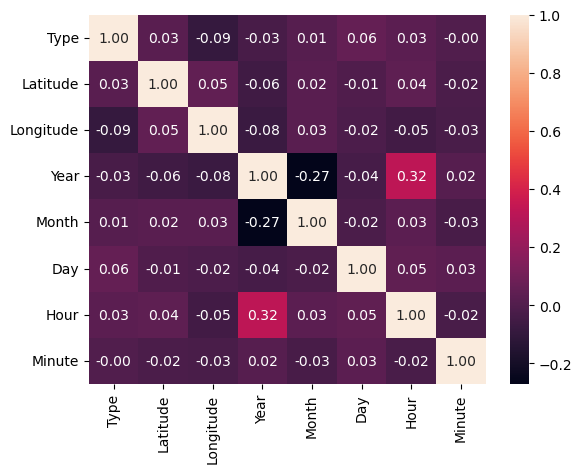

In [481]:
# relation between the Type and the other columns
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

The above heatmap shows that the correlation between each of the features is relatively low，meaning that there is little to no linear relationship between them. This is not expected. The correlation between latitude and longitude should be high, as they are both geographic features. In other words, there is not a clear, straightforward relationship between the features in this dataset. This is a good example of why it is important to visualize the data before performing any analysis.

In [482]:
def create_dataset(df, time_steps=1):
    X, y = [], []
    for i in range(len(df) - time_steps):
        v = df.iloc[i:(i + time_steps)]
        X.append(v)
        y.append(df.iloc[i + time_steps])
    return np.array(X), np.array(y)

In [483]:
# call create_dataset function
X,y = create_dataset(df,10)

In [484]:
# print the shape of X and y
print(X.shape)
print(y.shape)
# print the first 1 case of X
print(X[0])

(1323, 10, 8)
(1323, 8)
[[-0.84722105  0.15964068  0.33832515 -2.11731566  1.58834915 -1.45650226
   0.42676214  1.09523169]
 [-0.84722105  0.15272124  0.34468573 -2.11731566  1.58834915 -1.34491438
  -0.93232235  1.38603398]
 [-0.84722105  0.111227    0.30937616 -2.11731566  1.58834915 -1.34491438
  -0.73816742 -0.82406346]
 [-0.84722105  0.1666947   0.12409202 -2.11731566  1.58834915 -1.34491438
  -0.15570264  0.39730618]
 [-0.84722105  0.16243313  0.36848857 -2.11731566  1.58834915 -1.34491438
   1.00922692  0.45546664]
 [-0.84722105  0.15272124  0.34468573 -2.11731566  1.58834915 -1.2333265
  -0.15570264 -0.94038437]
 [ 1.1803295   0.15516603  0.28524695 -2.11731566  1.58834915 -1.01015074
  -0.93232235  0.86258985]
 [ 1.1803295   0.15516603  0.28524695 -2.11731566  1.58834915 -1.01015074
  -0.73816742 -1.52198896]
 [-0.84722105  0.11142886  0.2756909  -2.11731566  1.58834915 -1.01015074
   0.03845229  1.03707123]
 [ 1.1803295   0.13321894  0.37585864 -2.11731566  1.58834915 -0.786

In [485]:
# reshape y to 3 dimensions
y = y.reshape(y.shape[0], 1, y.shape[1]) # sample , 1 time step,  8 features
print(X.shape)
print(y.shape)

(1323, 10, 8)
(1323, 1, 8)


In [486]:
# split the data into train 80%, validation 10% and test 10% sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)


In [487]:
def build_model():
    model = models.Sequential()
    model.add(layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.LSTM(32, return_sequences=True))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(8))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# model summary
model = build_model()
model.summary()

# fit model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val,y_val),batch_size=512)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 10, 64)            18688     
                                                                 
 lstm_55 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_56 (LSTM)              (None, 64)                24832     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
Total params: 56,456
Trainable params: 56,456
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 4s 411ms/step - loss: 0.7485 - mae: 0.6895 - val_loss: 0.7520 - val_mae: 0.6747
Epoch 2/100
3/3 [==============================] -

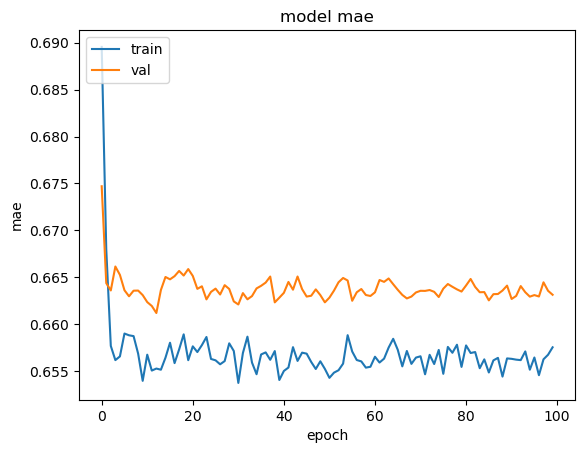

In [488]:
# plot mae
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The results shown in the above table show that the model is overfitting as validation is always above training. This is because the model is learning the training data too well and is not generalizing well to new data. This is a common problem with neural networks.
To verify thism, we can compare the results with test set and see if the same trend is observed.

In [489]:
y_pred = model.predict(X_test)

# print the shape of y_pred
print(y_pred.shape)

5/5 [==============================] - 1s 7ms/step
(133, 8)


In [490]:
# print the first 1 case of y_pred
print(y_pred[0])
# print the first 1 case of y_test
print(y_test[0])

[-0.02782511  0.13362285  0.30148625  0.00085858  0.01870877  0.02004472
 -0.00685958  0.02196241]
[[-0.84722105  0.11186623  0.37448482  0.19138109  1.29039398 -1.67967802
   0.815072   -0.64958208]]


In [491]:
# reshape y_pred same dimension as y_test
# y_pred = y_pred.reshape(y_pred.shape[0], 1,y_pred.shape[1])


In [492]:
# show both shape
print(y_pred.shape)
print(y_test.shape)

(133, 8)
(133, 1, 8)


In [493]:
b = pd.DataFrame(y_pred)
print(b)

            0         1         2         3         4         5         6  \
0   -0.027825  0.133623  0.301486  0.000859  0.018709  0.020045 -0.006860   
1   -0.019728  0.141108  0.304357  0.006506  0.009256  0.022241 -0.010138   
2   -0.033775  0.136855  0.294464 -0.010059  0.015389  0.009097 -0.013257   
3   -0.030167  0.140809  0.306265 -0.008427  0.014134  0.024760 -0.010057   
4   -0.034940  0.142102  0.301513 -0.013240  0.024669  0.025886 -0.008719   
..        ...       ...       ...       ...       ...       ...       ...   
128 -0.021850  0.137199  0.291415  0.000371  0.015151  0.020776 -0.006845   
129 -0.023528  0.142046  0.304213  0.001507  0.015510  0.023063 -0.008428   
130 -0.024431  0.135809  0.296063  0.005380  0.011530  0.012120 -0.010112   
131 -0.017302  0.133253  0.298692  0.015779  0.007021  0.006365 -0.007142   
132 -0.017821  0.132967  0.291250  0.012367  0.004512  0.012887 -0.006022   

            7  
0    0.021962  
1    0.023300  
2    0.034316  
3    0.0256

In [494]:
# inverse scale the pd.DataFrame b
def inverse_scale(pd):
    pd[0] = timeScaler.inverse_transform(pd[[0]])
    pd[1] = GeoScaler.inverse_transform(pd[[1]])
    pd[2] = GeoScaler.inverse_transform(pd[[2]])
    pd[3] = timeScaler.inverse_transform(pd[[3]])
    pd[4] = timeScaler.inverse_transform(pd[[4]])
    pd[5] = timeScaler.inverse_transform(pd[[5]])
    pd[6] = timeScaler.inverse_transform(pd[[6]])
    pd[7] = timeScaler.inverse_transform(pd[[7]])
    return pd

In [495]:
b = inverse_scale(b)

In [496]:
# print the inverse scaled pd.DataFrame b
print(b)

            0         1         2         3         4         5         6  \
0    0.404131 -0.109427 -0.087311  0.418278  0.427082  0.427741  0.414471   
1    0.408124 -0.108441 -0.086933  0.421063  0.422419  0.428824  0.412854   
2    0.401197 -0.109001 -0.088237  0.412893  0.425445  0.422341  0.411316   
3    0.402976 -0.108481 -0.086682  0.413698  0.424825  0.430066  0.412894   
4    0.400622 -0.108310 -0.087308  0.411324  0.430022  0.430622  0.413554   
..        ...       ...       ...       ...       ...       ...       ...   
128  0.407078 -0.108956 -0.088638  0.418038  0.425327  0.428101  0.414478   
129  0.406251 -0.108318 -0.086952  0.418598  0.425504  0.429229  0.413698   
130  0.405805 -0.109139 -0.088026  0.420508  0.423541  0.423832  0.412867   
131  0.409321 -0.109476 -0.087680  0.425637  0.421317  0.420994  0.414332   
132  0.409065 -0.109514 -0.088660  0.423954  0.420080  0.424210  0.414884   

            7  
0    0.428686  
1    0.429346  
2    0.434779  
3    0.4304

Conclusion 1 and Next Steps <br>
    I believe there is issue with my approach. Although the model is over fitting to training data. The prediction had unexpected result. The type of search that was conducted should only be true(0) or false(1), but the predicted type search contain number between 0 and 1. This is totally wrong and might be the reason why the model is overfitting and not generalizing and continue to improve after few epochs. I believe the issue was my encoding implementation. I will try to fix this issue below and see if the same model can be improved by fixing the encoding issue. If not, I will try to use different model and more data to see if the model can be improved. 

In [500]:
# calling the preprocessed df and move the Type column
df2 = df.drop(['Type'], axis=1)
print (df2)

      Latitude  Longitude      Year     Month       Day      Hour    Minute
0     0.159641   0.338325 -2.117316  1.588349 -1.456502  0.426762  1.095232
1     0.152721   0.344686 -2.117316  1.588349 -1.344914 -0.932322  1.386034
2     0.111227   0.309376 -2.117316  1.588349 -1.344914 -0.738167 -0.824063
3     0.166695   0.124092 -2.117316  1.588349 -1.344914 -0.155703  0.397306
4     0.162433   0.368489 -2.117316  1.588349 -1.344914  1.009227  0.455467
...        ...        ...       ...       ...       ...       ...       ...
1328  0.177741   0.227357  1.345729  1.290394  0.775255  2.368311 -1.289347
1329  0.177741   0.227357  1.345729  1.290394  0.886843  1.203382 -0.765903
1330  0.117025   0.311296  1.345729  1.290394  0.886843  1.785847 -1.638310
1331  0.107369   0.065769  1.345729  1.290394  1.110019  2.756621  0.746269
1332  0.171192   0.227167  1.345729  1.290394  1.221607 -1.320632  0.978911

[1333 rows x 7 columns]


In [502]:
X,y = create_dataset(df2,10)

In [503]:
# split the data into train 80%, validation 10% and test 10% sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [504]:
# reshape y to 3 dimensions
y = y.reshape(y.shape[0], 1, y.shape[1]) # sample , 1 time step,  n features

In [505]:
print(X.shape)
print(y.shape)

(1323, 10, 7)
(1323, 1, 7)


In [512]:
def build_model2():
    model = models.Sequential()
    model.add(layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.LSTM(32, return_sequences=True))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(7))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [513]:
# build model2
model2 = build_model2()
model2.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              (None, 10, 64)            18432     
                                                                 
 lstm_70 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_71 (LSTM)              (None, 64)                24832     
                                                                 
 dense_23 (Dense)            (None, 7)                 455       
                                                                 
Total params: 56,135
Trainable params: 56,135
Non-trainable params: 0
_________________________________________________________________


In [514]:
# fit model2
history2 = model2.fit(X_train, y_train, epochs=500, verbose=1, validation_data=(X_val,y_val),batch_size=512)

Epoch 1/500
3/3 [==============================] - 4s 406ms/step - loss: 0.7087 - mae: 0.6498 - val_loss: 0.6776 - val_mae: 0.6150
Epoch 2/500
3/3 [==============================] - 0s 25ms/step - loss: 0.6140 - mae: 0.5877 - val_loss: 0.5624 - val_mae: 0.5413
Epoch 3/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5165 - mae: 0.5198 - val_loss: 0.4618 - val_mae: 0.4647
Epoch 4/500
3/3 [==============================] - 0s 27ms/step - loss: 0.4465 - mae: 0.4540 - val_loss: 0.4291 - val_mae: 0.4224
Epoch 5/500
3/3 [==============================] - 0s 27ms/step - loss: 0.4239 - mae: 0.4244 - val_loss: 0.4281 - val_mae: 0.4155
Epoch 6/500
3/3 [==============================] - 0s 26ms/step - loss: 0.4167 - mae: 0.4150 - val_loss: 0.4145 - val_mae: 0.4028
Epoch 7/500
3/3 [==============================] - 0s 24ms/step - loss: 0.4120 - mae: 0.4075 - val_loss: 0.4120 - val_mae: 0.3966
Epoch 8/500
3/3 [==============================] - 0s 24ms/step - loss: 0.4056 - mae: 0.3

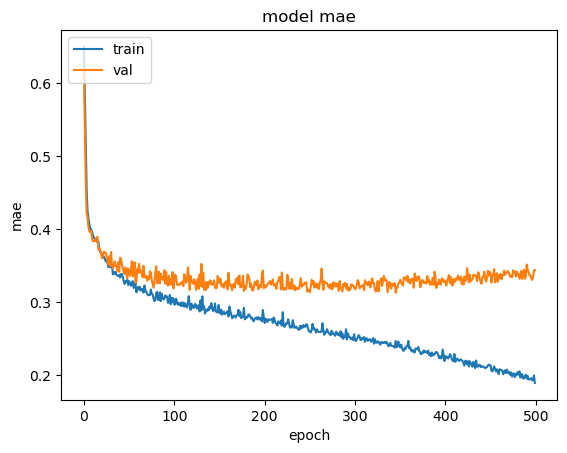

In [515]:
# plot mae
plt.plot(history2.history['mae'])
plt.plot(history2.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The above plot shows that the model is overfitting as validation is increasing while training is decreasing. This is because the model is learning the training data too well and is not generalizing well to new data. 
<br>
Problem:
<li> Overfitting</li>
Solution:
<li> Reduce epochs around 50</li>



In [524]:
model2ReducedEpochs = build_model2()
model2ReducedEpochs.summary()

# fit model2ReducedEpochs
history2ReducedEpochs = model2ReducedEpochs.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_val,y_val),batch_size=512)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 10, 64)            18432     
                                                                 
 lstm_73 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_74 (LSTM)              (None, 64)                24832     
                                                                 
 dense_24 (Dense)            (None, 7)                 455       
                                                                 
Total params: 56,135
Trainable params: 56,135
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 4s 456ms/step - loss: 0.6989 - mae: 0.6462 - val_loss: 0.6576 - val_mae: 0.6084
Epoch 2/50
3/3 [==============================] - 0

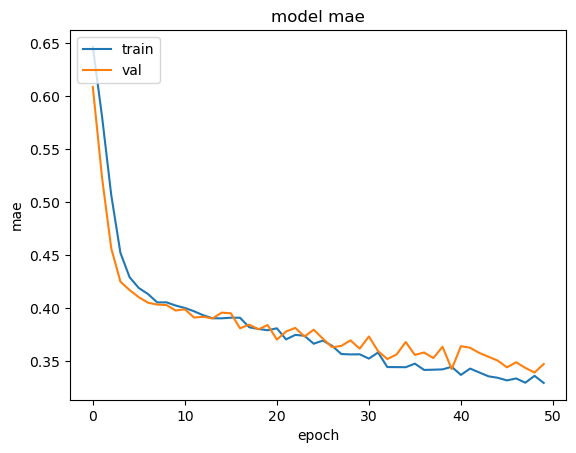

In [525]:
# plot mae
plt.plot(history2ReducedEpochs.history['mae'])
plt.plot(history2ReducedEpochs.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [532]:
def inverse_scale2(pd):
    pd[0] = GeoScaler.inverse_transform(pd[[0]])
    pd[1] = GeoScaler.inverse_transform(pd[[1]])
    pd[2] = timeScaler.inverse_transform(pd[[2]])
    pd[3] = timeScaler.inverse_transform(pd[[3]])
    pd[4] = timeScaler.inverse_transform(pd[[4]])
    pd[5] = timeScaler.inverse_transform(pd[[5]])
    pd[6] = timeScaler.inverse_transform(pd[[6]])
    return pd

In [533]:
#  make prediction
y_pred3 = model2.predict(X_test)

5/5 [==============================] - 0s 7ms/step


In [534]:
print(y_pred3.shape)

(133, 7)


In [535]:
a = pd.DataFrame(y_pred3)
print(a)

            0         1         2         3         4         5         6
0    0.105036  0.322244  0.401383  1.628521 -0.457835 -0.428792  0.165456
1    0.154324  0.291900 -0.792366  0.852417 -0.050695 -0.832263  0.133070
2    0.130605  0.365182  0.255603  0.332680 -0.382537  0.191958  0.791232
3    0.115566  0.318630 -0.941986  1.467340 -0.875257 -0.297878  0.235897
4    0.141165  0.275513  1.405019 -1.372618 -1.008768 -0.042462 -0.072661
..        ...       ...       ...       ...       ...       ...       ...
128  0.135821  0.337193  0.189696  0.342267 -0.503109  0.287887  0.337513
129  0.098758  0.363438  0.310824  0.449983 -1.452887  0.165172 -0.483220
130  0.273546  0.482986 -0.853572 -0.889085 -0.566338  0.643212 -0.350319
131  0.141586  0.275263  0.371099 -1.285605  1.350316 -0.240614 -1.064831
132  0.198765  0.349320  1.277762  0.952919  0.940846  1.793860 -0.002065

[133 rows x 7 columns]


In [536]:
a = inverse_scale2(a)
print(a)

            0         1         2         3         4         5         6
0   -0.113194 -0.084577  0.615819  1.221051  0.192048  0.206372  0.499458
1   -0.106700 -0.088575  0.027055  0.838272  0.392852  0.007377  0.483485
2   -0.109825 -0.078920  0.543919  0.581934  0.229185  0.512529  0.808095
3   -0.111806 -0.085053 -0.046738  1.141555 -0.013827  0.270939  0.534200
4   -0.108434 -0.090733  1.110818 -0.259129 -0.079676  0.396912  0.382018
..        ...       ...       ...       ...       ...       ...       ...
128 -0.109138 -0.082607  0.511414  0.586663  0.169718  0.559842  0.584318
129 -0.114021 -0.079149  0.571155  0.639789 -0.298718  0.499318  0.179527
130 -0.090993 -0.063399 -0.003132 -0.020647  0.138533  0.735091  0.245075
131 -0.108378 -0.090766  0.600882 -0.216214  1.083838  0.299182 -0.107327
132 -0.100845 -0.081009  1.048054  0.887840  0.881885  1.302597  0.416836

[133 rows x 7 columns]


In [537]:
# save as csv for inspection
a.to_csv('prototype2ReduceEpochs.csv')